In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
car=pd.read_csv("Toyota.csv",index_col=0,na_values=["??","????"])
car1=car.copy() #copy the dataset
car

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [9]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [11]:
#cleaning the data
car1["MetColor"]=car1["MetColor"].astype("object")
car1["Automatic"]=car1["Automatic"].astype("object")
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 123.4+ KB


In [15]:
print(np.unique(car1["Doors"]))  

car1["Doors"].replace("three",3,inplace=True)
car1["Doors"].replace("four",4,inplace=True)
car1["Doors"].replace("five",5,inplace=True)
car1["Doors"]=car1["Doors"].astype("int64")
car1.info()

[2 3 4 5]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 123.4+ KB


In [17]:
#detecting the missing values
print(car1.isnull().sum())

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64


In [19]:
car1.insert(10,"Price_Class","0")
for i in range(0,len(car1["Price"])):
    if(car1["Price"][i]<=8450):
        car1["Price_Class"][i]="Low"
    elif(car1["Price"][i]>11950):
        car1["Price_Class"][i]="High"
    else:
        car1["Price_Class"][i]="Medium"
print(car1["Price_Class"].value_counts())

<ipython-input-19-770e01c40d19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1["Price_Class"][i]="High"
<ipython-input-19-770e01c40d19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1["Price_Class"][i]="Low"
<ipython-input-19-770e01c40d19>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1["Price_Class"][i]="Medium"


Medium    751
Low       369
High      316
Name: Price_Class, dtype: int64


In [20]:
car1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_Class
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025,Low
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015,Medium
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015,Medium
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015,Low


In [29]:
#car1.insert(11,"Age_Converted", "0")
for i in range(0, len(car1['Age'])):
     car1['Age_Converted'][i]= car1['Age'][i]/12
     car1['Age_Converted'][i]= round(car1['Age_Converted'][i],1)
print(car1["Age_Converted"].value_counts())


print(car1)

<ipython-input-29-24e07bf318b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['Age_Converted'][i]= car1['Age'][i]/12
<ipython-input-29-24e07bf318b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['Age_Converted'][i]= round(car1['Age_Converted'][i],1)


5.2    71
5.4    62
5.7    60
6.2    59
6.7    52
       ..
1.0     2
0.1     2
1.5     1
0.2     1
0.5     1
Name: Age_Converted, Length: 66, dtype: int64
      Price   Age       KM FuelType     HP MetColor Automatic    CC  Doors  \
0     13500  23.0  46986.0   Diesel   90.0      1.0         0  2000      3   
1     13750  23.0  72937.0   Diesel   90.0      1.0         0  2000      3   
2     13950  24.0  41711.0   Diesel   90.0      NaN         0  2000      3   
3     14950  26.0  48000.0   Diesel   90.0      0.0         0  2000      3   
4     13750  30.0  38500.0   Diesel   90.0      0.0         0  2000      3   
...     ...   ...      ...      ...    ...      ...       ...   ...    ...   
1431   7500   NaN  20544.0   Petrol   86.0      1.0         0  1300      3   
1432  10845  72.0      NaN   Petrol   86.0      0.0         0  1300      3   
1433   8500   NaN  17016.0   Petrol   86.0      0.0         0  1300      3   
1434   7250  70.0      NaN      NaN   86.0      1.0         0  1

In [30]:
#Find which Fuel Type car is more in Number
print(pd.crosstab(index=car1["FuelType"],columns='count',dropna=True))

col_0     count
FuelType       
CNG          15
Diesel      144
Petrol     1177


In [33]:
#car1.insert(12,"KM/Month", "0")
for i in range(0, len(car1['KM'])):
     car1['KM/Month'][i]= car1['KM'][i]/car1['Age'][i]
     car1['KM/Month'][i]= round(car1['KM/Month'][i],1)
print(car1["KM/Month"].value_counts())

print(car1)

<ipython-input-33-4d888ff254a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['KM/Month'][i]= car1['KM'][i]/car1['Age'][i]
<ipython-input-33-4d888ff254a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['KM/Month'][i]= round(car1['KM/Month'][i],1)


1000.0    6
904.8     3
789.5     3
923.1     3
553.8     3
         ..
2161.4    1
819.7     1
818.6     1
3003.7    1
1216.6    1
Name: KM/Month, Length: 1249, dtype: int64
      Price   Age       KM FuelType     HP MetColor Automatic    CC  Doors  \
0     13500  23.0  46986.0   Diesel   90.0      1.0         0  2000      3   
1     13750  23.0  72937.0   Diesel   90.0      1.0         0  2000      3   
2     13950  24.0  41711.0   Diesel   90.0      NaN         0  2000      3   
3     14950  26.0  48000.0   Diesel   90.0      0.0         0  2000      3   
4     13750  30.0  38500.0   Diesel   90.0      0.0         0  2000      3   
...     ...   ...      ...      ...    ...      ...       ...   ...    ...   
1431   7500   NaN  20544.0   Petrol   86.0      1.0         0  1300      3   
1432  10845  72.0      NaN   Petrol   86.0      0.0         0  1300      3   
1433   8500   NaN  17016.0   Petrol   86.0      0.0         0  1300      3   
1434   7250  70.0      NaN      NaN   86.0   

In [34]:
print(pd.crosstab(index=car1["Automatic"],columns=car1["FuelType"],dropna=True))


FuelType   CNG  Diesel  Petrol
Automatic                     
0           15     144    1104
1            0       0      73


In [36]:
print(pd.crosstab(index=car1["FuelType"],columns=car1["Automatic"],dropna=True))

Automatic     0   1
FuelType           
CNG          15   0
Diesel      144   0
Petrol     1104  73


In [38]:
#probability that car is manual gear and uses petrol
print(pd.crosstab(index=car1["Automatic"],columns=car1["FuelType"],normalize=True,dropna=True))

FuelType        CNG    Diesel    Petrol
Automatic                              
0          0.011228  0.107784  0.826347
1          0.000000  0.000000  0.054641


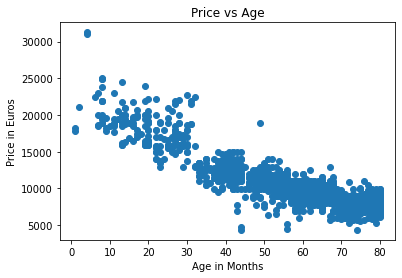

In [39]:
#scatter plot of age vs price
plt.scatter(car1["Age"],car1["Price"])
plt.title("Price vs Age")
plt.xlabel("Age in Months")
plt.ylabel("Price in Euros")
plt.show()